In [42]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [1]:
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sys
import os
magicbeans_path = "../../MagicBeans/machinery/"
sys.path.append(magicbeans_path)
magicbeans_path = os.path.abspath(magicbeans_path)

In [4]:
import get_galsim_data_with_different_n_and_k as galsim_sample

In [5]:
data_path = '../../MagicBeans/threshing/galsim_fake_inputs'

# Generate FakeReaper files 

In [6]:
import h5py
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [17]:
!ls $galsim_grid_infile

ls: ../../MagicBeans/threshing/galsim_fake_inputs/shear_gaussian_grid_galsim_20by20.h5: No such file or directory


In [10]:
true_sigma_e_list = [0.01, 0.258]
ngalsamples_list = [10, 100, 500]  # also known as k
ngals_list = [500, 1000, 5000]     # also known as n
noise_sigma = 0.0001
galsim_grid_infile = \
    "../../MagicBeans/threshing/galsim_fake_inputs/" + \
    "shear_gaussian_grid_galsim_20by20.h5"

In [19]:
fakereap_file_list = \
    galsim_sample.make_galsim_grid(
        true_sigma_e_list, ngalsamples_list, ngals_list,
        noise_sigma, galsim_grid_infile, verbose=False
    )

# read them one by one in as pandas df

In [20]:
h5_filelist = [h5py.File(h5_filepath) 
               for h5_filepath in fakereap_file_list]

In [35]:
df_list = [galsim_sample.read_as_df(h5file) 
           for h5file in h5_filelist]

exact part of the file read by `Thresher.cpp` is 

```
gals/samples
```

initialize 100 dataframes, one for each galaxy, and all its samples, add a column value for denoting the `ngal` value

In [36]:
params = [galsim_sample.find_params(h5file_path) 
          for h5file_path in fakereap_file_list]

In [37]:
params[param_set]

[0.01, 10.0, 5000.0]

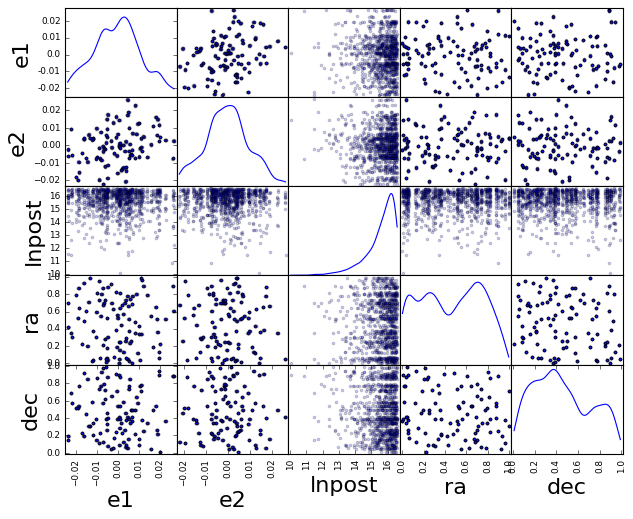

In [38]:
cols = ['e1','e2','lnpost', 'ra', 'dec']

fig = plt.figure()
param_set = 0
ax = fig.add_subplot(111)
ax.set_title("sigma_e={0}, k={1}, n={2}".format(*params[param_set]))
_ = scatter_matrix(df_list[param_set][cols], 
                   alpha=0.2, diagonal='kde', ax=ax)

# Examine the generated ellipticities stat

In [43]:
for param_set in range(len(df_list)):
    print "sigma_e={0}, k={1}, n={2}".format(*params[param_set])
    print df_list[param_set][['e1', 'e2']].describe() 
    print "\n\n"

sigma_e=0.01, k=10.0, n=500.0
                e1           e2
count  1000.000000  1000.000000
mean     -0.000348    -0.000200
std       0.011415     0.010004
min      -0.023760    -0.022125
25%      -0.007968    -0.006747
50%       0.000485    -0.000442
75%       0.006536     0.005848
max       0.026429     0.026365



sigma_e=0.01, k=10.0, n=1000.0
                e1           e2
count  1000.000000  1000.000000
mean     -0.000193    -0.000160
std       0.009963     0.011872
min      -0.026199    -0.028627
25%      -0.006694    -0.009694
50%       0.000019    -0.000776
75%       0.006457     0.009467
max       0.030004     0.026028



sigma_e=0.01, k=10.0, n=5000.0
                e1           e2
count  1000.000000  1000.000000
mean     -0.000372     0.000047
std       0.009872     0.009710
min      -0.027547    -0.024382
25%      -0.008222    -0.006793
50%      -0.000333     0.001063
75%       0.006603     0.005902
max       0.028753     0.023807



sigma_e=0.01, k=100.0, n=500.0
    